In [75]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler
from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

import warnings
warnings.filterwarnings('ignore')

print('Imported successfully')

Imported successfully


In [6]:
#set random seed and percentage of test data
RANDOM_SEED = 314 #used to help randomly select the data points
TEST_PCT = 0.2 # 20% of the data

In [26]:
#set up Colour style
rcParams['figure.figsize'] = 14, 8.7 # Golden Mean
LABELS = ["Normal","Fraud"]
col_list = ["cerulean","scarlet"]
sns.set(style='white', font_scale=1.75, palette=sns.xkcd_palette(col_list))#set the graphs dsign style

In [27]:
#Add CSV File
df = pd.read_csv("creditcard.csv") 
df.head(n=10) #just to check you imported the dataset properly

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [28]:
#This section is used to confirm the data imported
df.shape #secondary check on the size of the dataframe


(284807, 31)

In [29]:
#check to see if any values are null, which there are not
df.isnull().values.any() #THe output should be False

False

In [34]:
#Number of distinct categories or classes i.e., Fraudulent and Genuine
df['Class'].nunique()   #there are only 2 unique classes as expected 

2

In [35]:
#This section will give the output for Normal and Fraudulent rows of Data
pd.value_counts(df['Class'], sort = True) #class comparison 0=Normal 1=Fraud

0    284315
1       492
Name: Class, dtype: int64

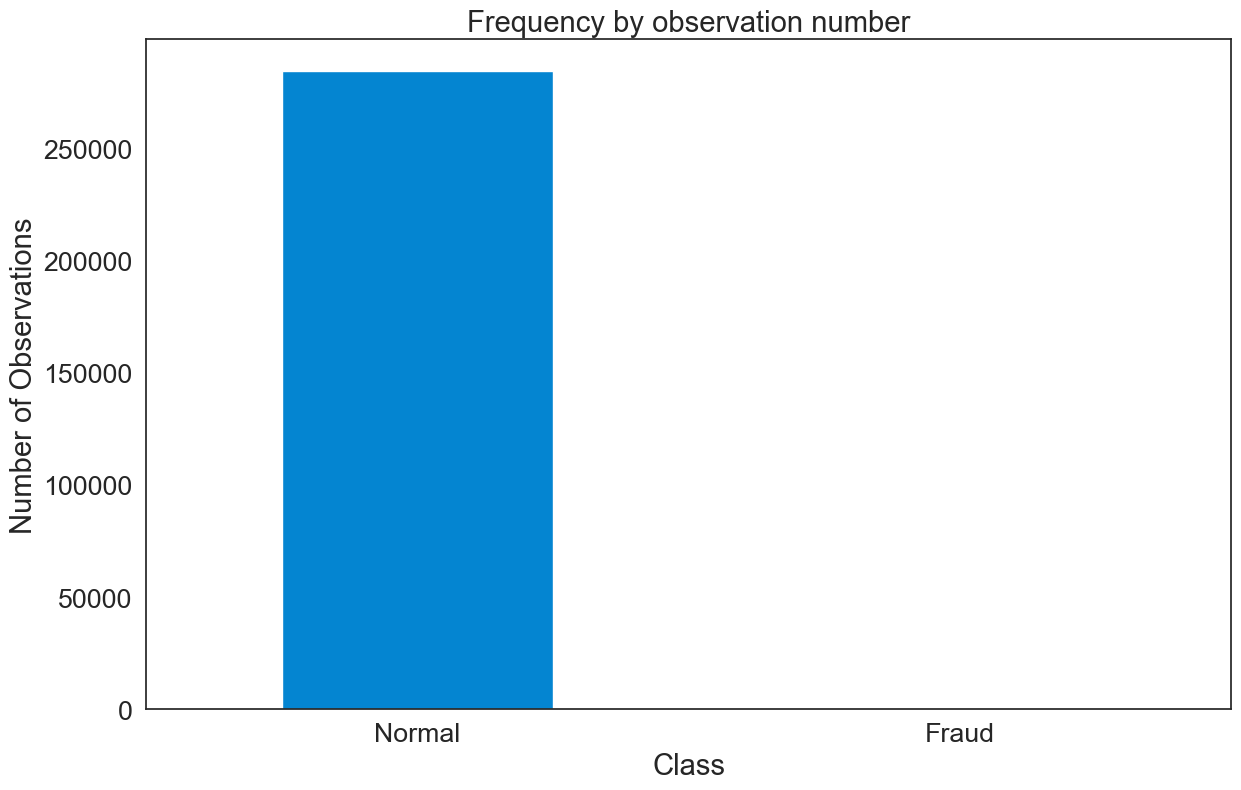

In [36]:
#Balance of Data Visualization
#Visual confirmation of unbalanced Data in the Dataset
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.xticks(range(2), LABELS)
plt.title("Frequency by observation number")
plt.xlabel("Class")
plt.ylabel("Number of Observations");


In [38]:
#Data processing
normal_count = len(df[df.Class == 0]) # count the number of normal transactions assigned 0
fraud_count = len(df[df.Class == 1]) #count the number of fraudulent transactions assigned 1

#percentage of fraudulent transaction
fraud_percentage = round(normal_count/fraud_count*100, 2)
#total number of cases
cases = len(df)

print('CASE COUNT STATISTICS') #this attribute will print in BOLD uppercase
print('Total number of cases are {}'.format(cases))
print('Number of Non-fraud cases are {}'.format(normal_count))
print('Number of Non-fraud cases are {}'.format(fraud_count))
print('Percentage of fraud cases is {}'.format(fraud_percentage))

CASE COUNT STATISTICS
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 57787.6


In [39]:
#Summary Statistics of the Transaction Amount Data
normal_df = df[df.Class == 0] #save normal_df observations into a separate df
fraud_df = df[df.Class == 1] #do the same for frauds

In [40]:
#Description of Differences btw the Normal and Fraud data
normal_df.Amount.describe() #For Normal
fraud_df.Amount.describe() #For Fraud

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

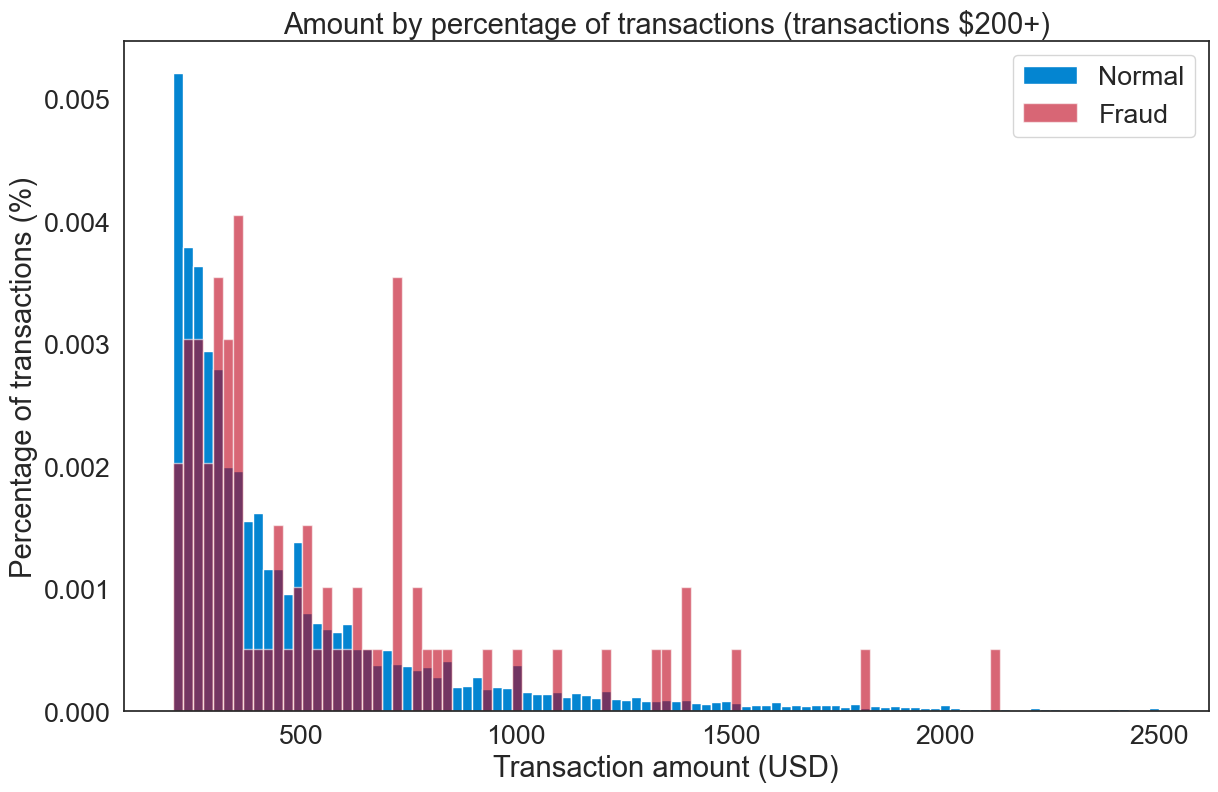

In [41]:
#Visual Exploration of the Transaction Amount Data
#plot of high value transactions
bins = np.linspace(200, 2500, 100)
plt.hist(normal_df.Amount, bins, alpha=1, density=True, label='Normal')
plt.hist(fraud_df.Amount, bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200+)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)");
plt.show()

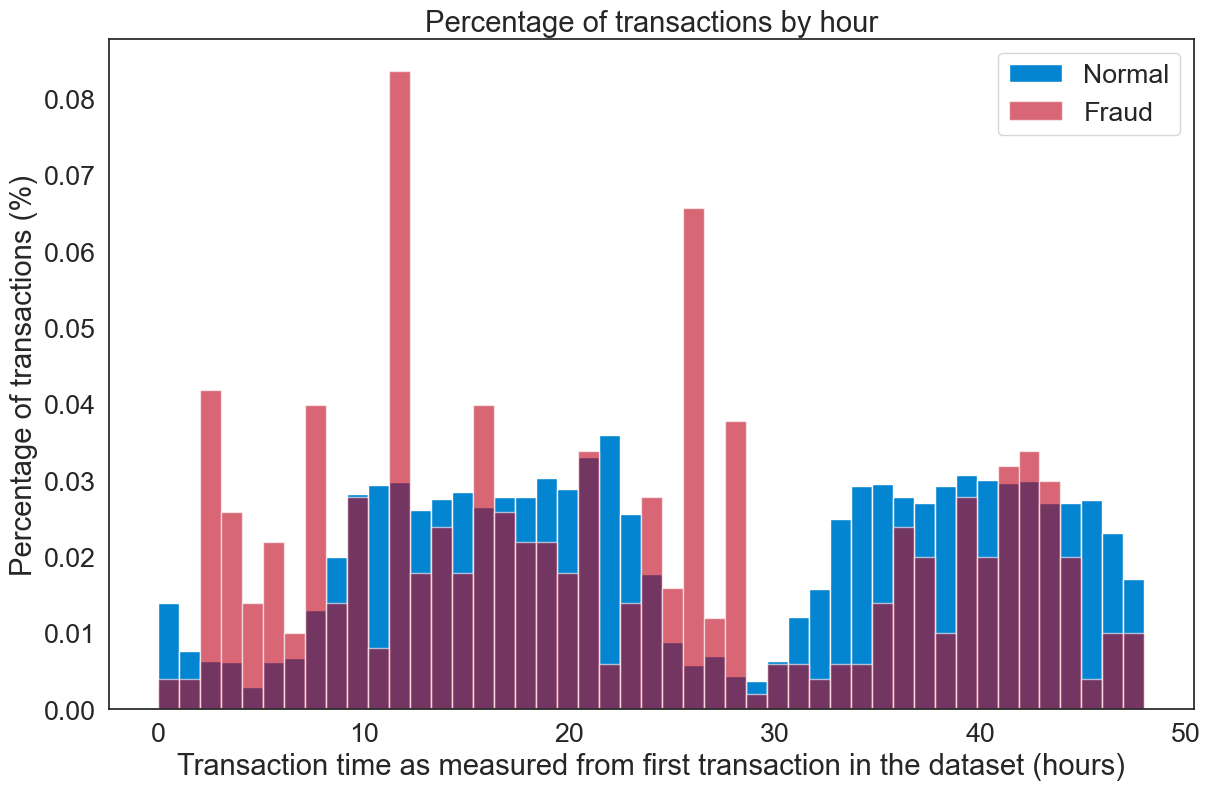

In [42]:
#Visual Exploration of the Data by Hour
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((normal_df.Time/(60*60)), bins, alpha=1, density=True, label='Normal')
plt.hist((fraud_df.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)");
#plt.hist((df.Time/(60*60)),bins)
plt.show()

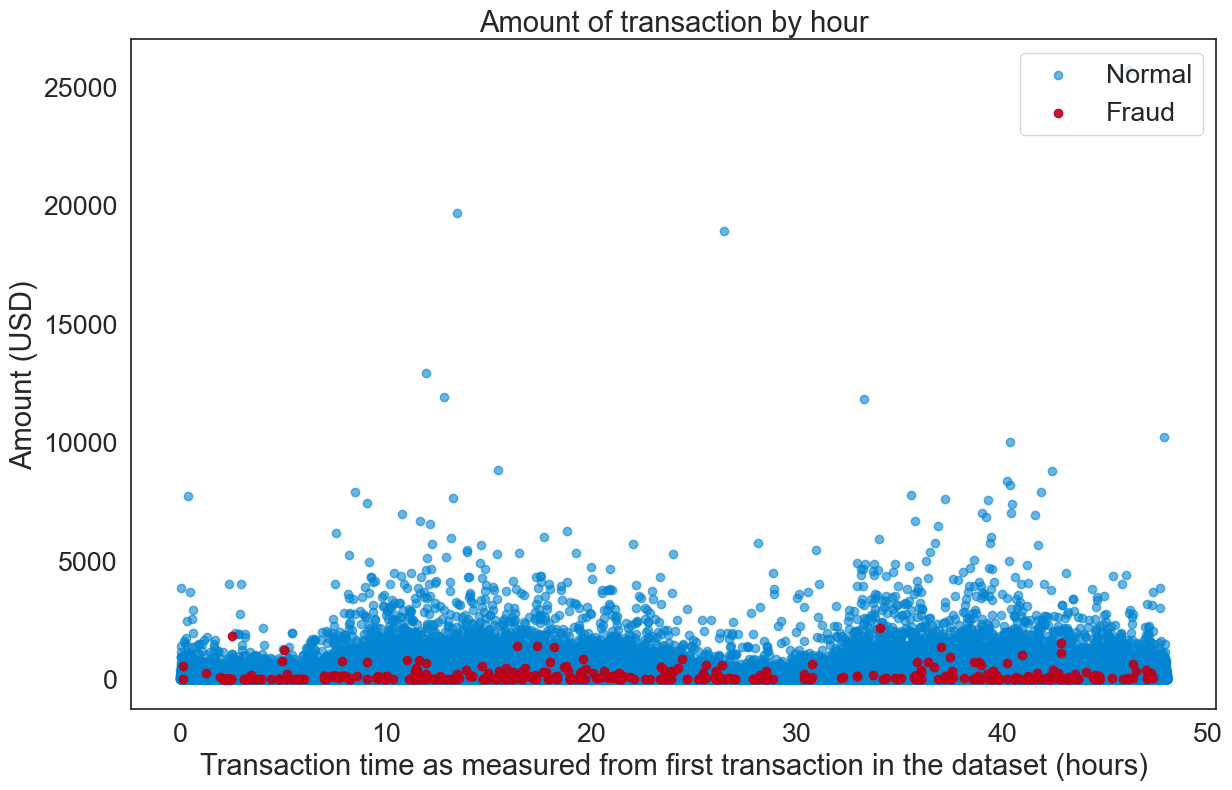

In [18]:
#Visual Exploration of Transaction Amount vs. Hour
plt.scatter((normal_df.Time/(60*60)), normal_df.Amount, alpha=0.6, label='Normal')
plt.scatter((fraud_df.Time/(60*60)), fraud_df.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

In [43]:
#values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables.
#I NORMALIZED it using the ‘StandardScaler’ from sklearn to reduce its wide range of values

#FIRST I dropped the time feature as it is IRRELEVANT to building the models. 
data = df.drop(['Time'], axis=1) #if you think the var is unimportant

#NORMALIZATION & Scale Data with StandardScaler 
df_norm = df
df_norm['Amount'] = StandardScaler().fit_transform(df_norm['Amount'].values.reshape(-1, 1))
df_norm['Time'] = StandardScaler().fit_transform(df_norm['Time'].values.reshape(-1, 1))

print(df_norm['Amount'].head(10))


#N.B normalizing "Time" is really not necessary


0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


### Feature selection and data Slipt

random seed and percentage of test data 0.2 has been set in the beginning of code

In [45]:
#defined the independent as (X) and dependent variables as (Y)
# train_test_split is used to slipt the data into training set and testing set 

#Dividing Training and 2Test Set
train_x, test_x = train_test_split(df_norm, test_size=TEST_PCT, random_state=RANDOM_SEED)
#TRAIN
train_x = train_x[train_x.Class == 0] #where normal transactions
train_x = train_x.drop(['Class'], axis=1) #drop the class column

In [46]:
# TEST
test_y = test_x['Class'] #save the class column for the test set
test_x = test_x.drop(['Class'], axis=1) #drop the class column

In [47]:
# TRAINING
train_x = train_x.values #transform to ndarray
test_x = test_x.values


In [48]:
#confirming the new ndarray is the expected shape
train_x.shape


(227468, 30)

## Model

In [49]:
#Creating the Model
#Autoencoder Layer Structure and Parameters
nb_epoch = 100 #number of time algorithm runs in training the dataset
batch_size = 128 #number of samples(single row in data) taken for updating the model paraeters
input_dim = train_x.shape[1] #num of columns, 30
encoding_dim = 14
hidden_dim = int(encoding_dim / 2) #e.g 7
learning_rate = 1e-7 #scale of how much model weights should be updated

input_layer = Input(shape=(input_dim, ))
encoder = Dense(encoding_dim, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(hidden_dim, activation='tanh')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [50]:
#Model Training and Logging
autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

In [51]:
#create check point callback
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

In [52]:
#Tensorboard callback
tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

In [53]:
#MODEL OPTIMIZATION process
#FIT the model to the data it is training
history = autoencoder.fit(train_x, train_x,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_x, test_x),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/100
1778/1778 [==============================] - 14s 6ms/step - loss: 0.8624 - accuracy: 0.4648 - val_loss: 0.8113 - val_accuracy: 0.5930
Epoch 2/100
1778/1778 [==============================] - 11s 6ms/step - loss: 0.7575 - accuracy: 0.6090 - val_loss: 0.7787 - val_accuracy: 0.6188
Epoch 3/100
1778/1778 [==============================] - 10s 6ms/step - loss: 0.7369 - accuracy: 0.6297 - val_loss: 0.7657 - val_accuracy: 0.6369
Epoch 4/100
1778/1778 [==============================] - 9s 5ms/step - loss: 0.7276 - accuracy: 0.6451 - val_loss: 0.7604 - val_accuracy: 0.6509
Epoch 5/100
1778/1778 [==============================] - 11s 6ms/step - loss: 0.7226 - accuracy: 0.6545 - val_loss: 0.7554 - val_accuracy: 0.6668
Epoch 6/100
1778/1778 [==============================] - 9s 5ms/step - loss: 0.7188 - accuracy: 0.6609 - val_loss: 0.7504 - val_accuracy: 0.6644
Epoch 7/100
1778/1778 [==============================] - 11s 6ms/step - loss: 0.7159 - accuracy: 0.6650 - val_loss: 0.7463 - v

In [54]:
autoencoder = load_model('autoencoder_fraud.h5')


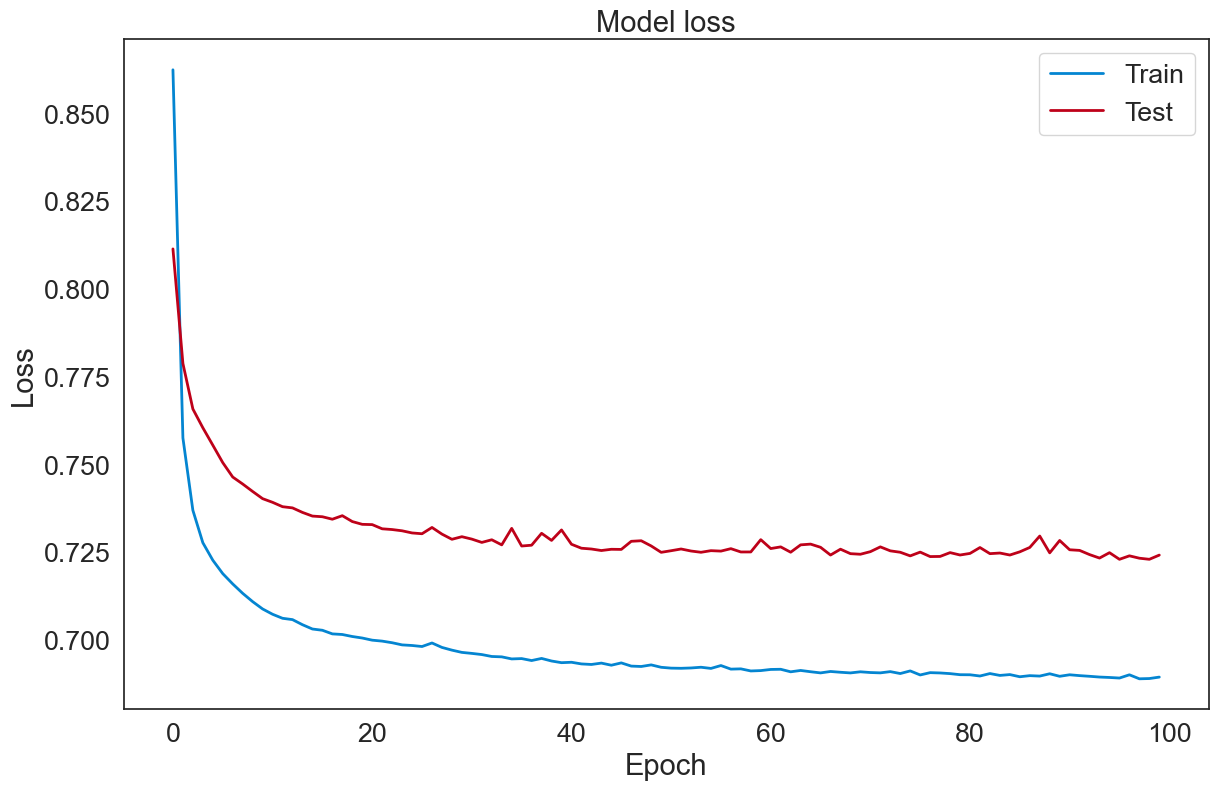

In [55]:
#Model Evaluation
#Model Loss

plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.ylim(ymin=0.70,ymax=1)
plt.show()

## Model Evaluation

In [56]:
#Reconstruction Error Check
test_x_predictions = autoencoder.predict(test_x)
mse = np.mean(np.power(test_x - test_x_predictions, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': test_y})
error_df.describe()


1781/1781 [==============================] - 6s 3ms/step


,Reconstruction_error,True_class
count,56962.000000,56962.000000
mean,0.722875,0.002019
std,3.097996,0.044887
min,0.048915,0.000000
25%,0.246295,0.000000
50%,0.389917,0.000000
75%,0.621596,0.000000
max,194.451093,1.000000


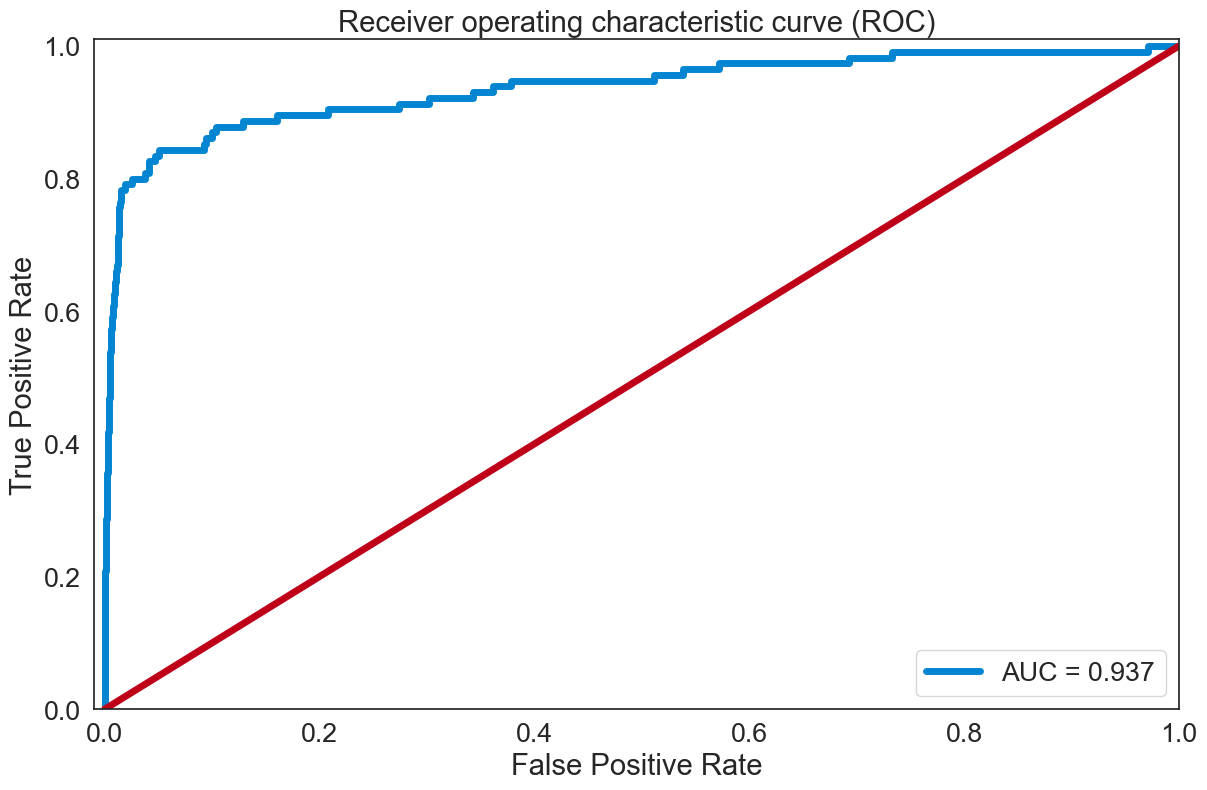

In [59]:
#ROC Curve Check
false_pos_rate, true_pos_rate, thresholds = roc_curve(error_df.True_class, error_df.Reconstruction_error)
roc_auc = auc(false_pos_rate, true_pos_rate,)

plt.plot(false_pos_rate, true_pos_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
plt.plot([0,1],[0,1], linewidth=5)

plt.xlim([-0.01, 1])
plt.ylim([0, 1.01])
plt.legend(loc='lower right')
plt.title('Receiver operating characteristic curve (ROC)')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

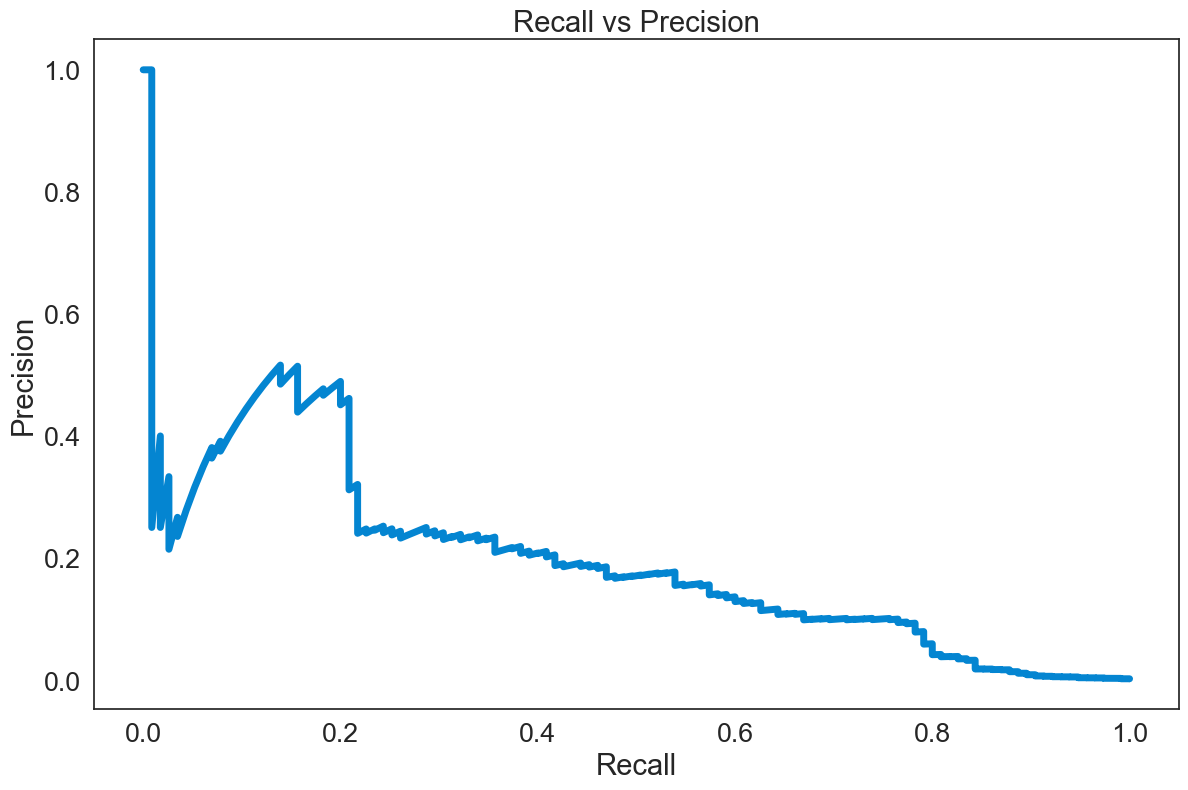

In [65]:
#Recall vs. Precision Thresholding
#Recall-v-Precision
precision_rt, recall_rt, threshold_rt = precision_recall_curve(error_df.True_class, error_df.Reconstruction_error)
plt.plot(recall_rt, precision_rt, linewidth=5, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

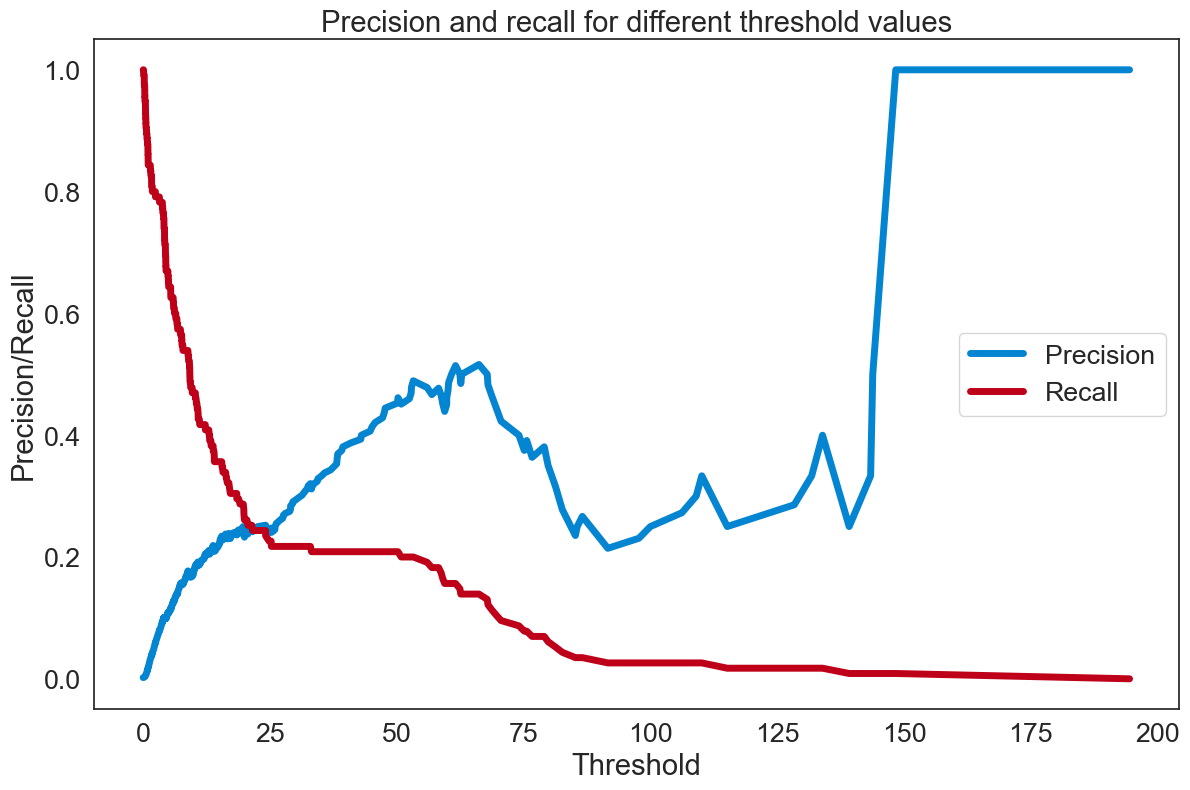

In [66]:
#precision-and-recall-tensorflow
plt.plot(threshold_rt, precision_rt[1:], label="Precision",linewidth=5)
plt.plot(threshold_rt, recall_rt[1:], label="Recall",linewidth=5)
plt.title('Precision and recall for different threshold values')
plt.xlabel('Threshold')
plt.ylabel('Precision/Recall')
plt.legend()
plt.show()

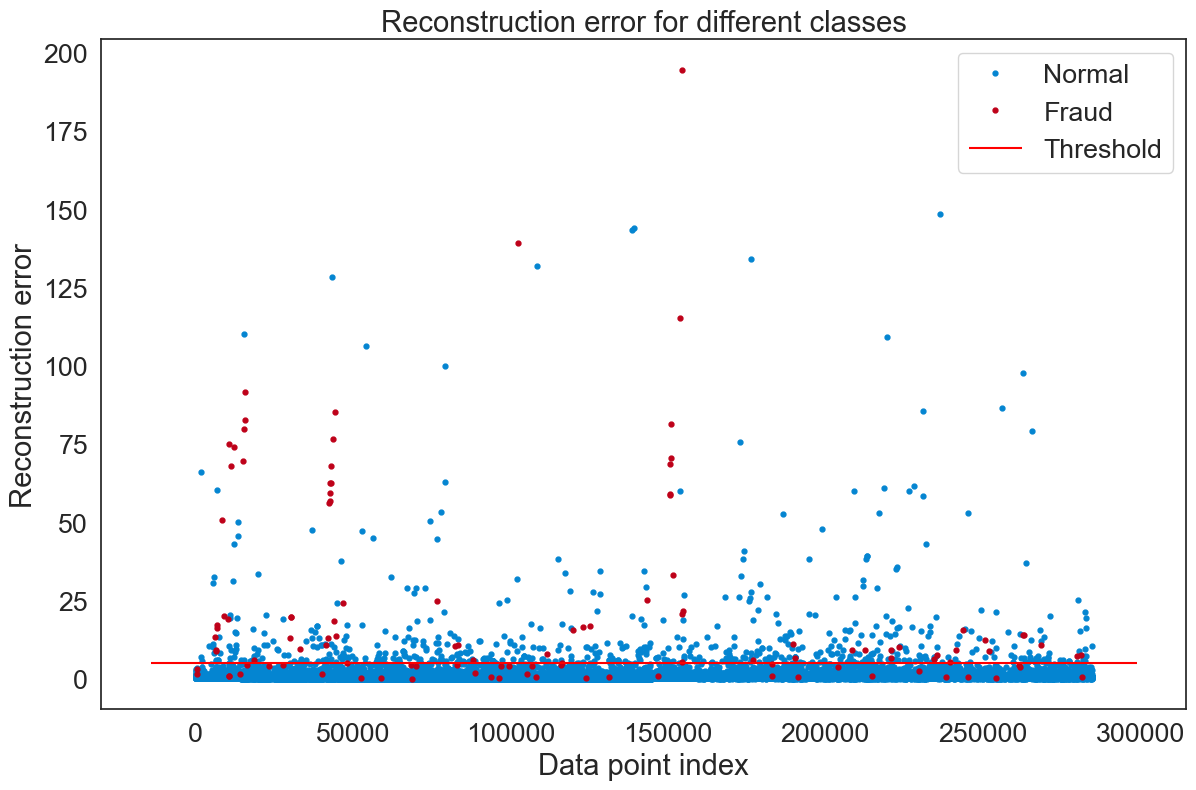

In [67]:
#Reconstruction Error vs Threshold Check
threshold_fixed = 5
groups = error_df.groupby('True_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.Reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_fixed, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show(); 

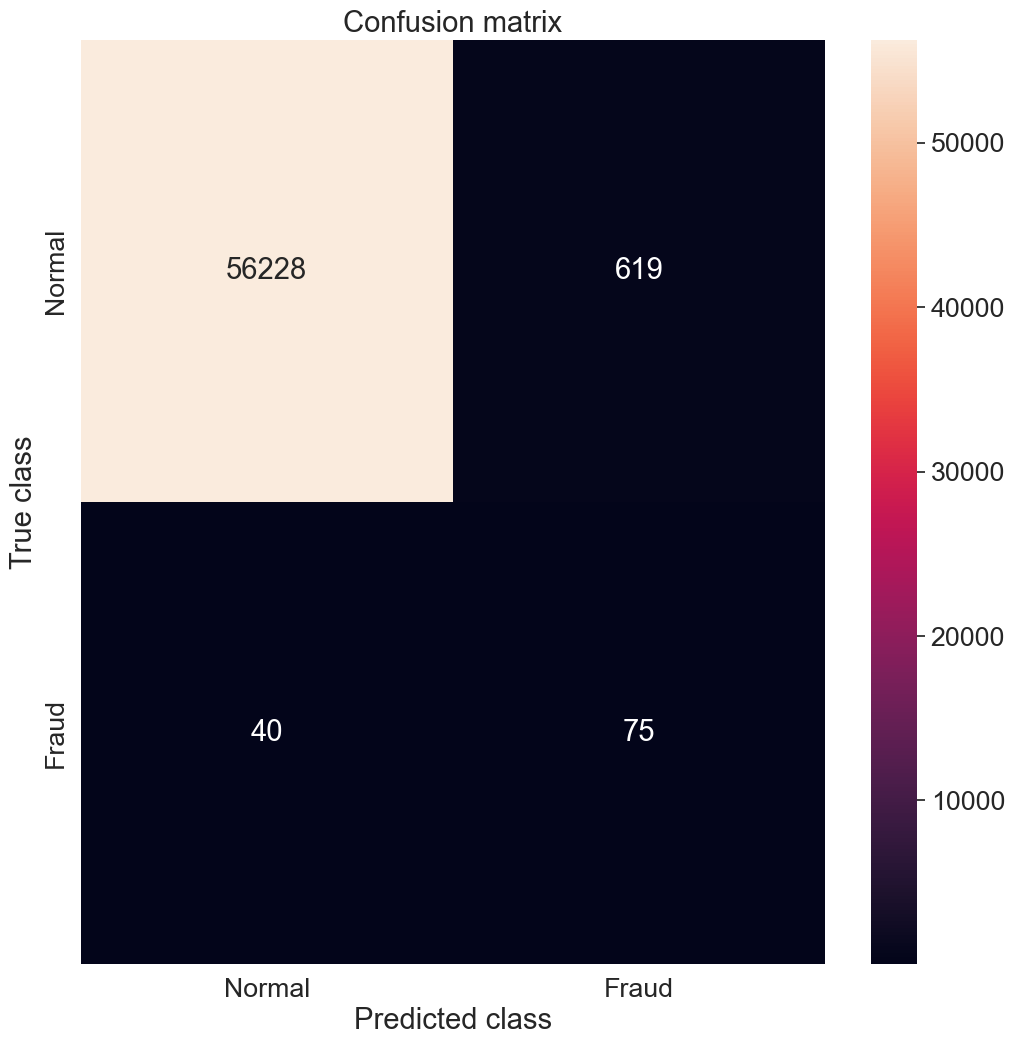

In [68]:
#Confusion Matrix
pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.True_class, pred_y) #this will carryout CLASSIFICATION

plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [70]:
 print(classification_report(error_df.True_class, pred_y))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56847
           1       0.11      0.65      0.19       115

    accuracy                           0.99     56962
   macro avg       0.55      0.82      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [81]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [82]:
# DISPLAY THE VALUE FOR ACCURACY
acc = accuracy_score(error_df.True_class, pred_y)
print('Accuracy: %f' % acc)

Accuracy: 0.988431


In [84]:
# DISPLAY THE VALUE FOR PRECISION
precision = precision_score(error_df.True_class, pred_y)
print('Precision: %f' % precision)

Precision: 0.108069


In [85]:
# DISPLAY THE VALUE FOR RECALL
recall = recall_score(error_df.True_class, pred_y)
print('Recall: %f' % precision)

Recall: 0.108069
